# **Olympic Economics and Performance Metrics: GDP, Population, and Medals Analysis**

Hi,

I am a Junior Data Analyst with a deep passion for the Winter and Summer Olympics, which has been with me since birth.

I hypothesized that a country's wealth and population size could influence its chances of improving its medal count and advancing in the race for gold.

This notebook explores the relationship between a country's GDP, population, and number of athletes participating, and its medal tally at the 2024 Olympics. Three new variables are analyzed: GDP cost per medal, population per medal, and conversion rate (medals / number of athletes).

Since 2023 data was not available for all countries, I used 2022 data for GDP and population variables. I will update this notebook until August 11, when the final medal is awarded (last updated was made on August 4).

For the most surprising results, please refer to sections 4.3 and 4.4.

Additionally, I conducted a Principal Component Analysis at the end of this notebook and I also explored k-means clustering as one unsupervised learning technique.

If you have any recommendations or suggestions, I would love to hear them!

# **Step 1 - Importing Libraries and Loading Files**

In [52]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy as sp

In [53]:
plt.style.use('default')

In [54]:
#Import of file athletes
athletes = pd.read_csv('athletes.csv')
#Import of file medals_total
medals = pd.read_csv('medals_total.csv', sep=',')
#Import of file GDP (base year is 2022 as 2023 data has yet to be validated)
GDP = pd.read_csv('gdp.csv')
#Import of file population (base year is 2022 as 2023 data has yet to be validated)
population = pd.read_csv('world_population.csv', sep=',')
#sources : https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games/data?select=medals_total.csv
#https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
#https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

# **Step 2 - EDA**

## **2.1 athletes**

In [55]:
#Display the dataset dimensions
print("The table has {} observation(s) or article(s)".format(athletes.shape[0]))
print("The table has {} column(s)".format(athletes.shape[1]))

The table has 11067 observation(s) or article(s)
The table has 35 column(s)


In [56]:
athletes.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Francisco Ramon Valencia Fontes. Mothe...",Spanish,National/personal: Miguel Angel Flores (MEX),Grew up close to an archery range and was alwa...,NaN,NaN,NaN,NaN,NaN,NaN
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,Two brothers,"English, Spanish",National: Miguel Angel Flores (MEX).<br>Person...,She followed her brothers into archery,NaN,NaN,NaN,NaN,NaN,NaN
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Nicolas",Spanish,National: David Alejandro Velez Sanchez (MEX),His father introduced him to the sport and the...,NaN,NaN,NaN,NaN,NaN,NaN
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,NaN,"German, Spanish",National: David Alejandro Velez Sanchez (MEX),He was inspired by the Disney animated movie R...,NaN,NaN,NaN,NaN,NaN,NaN
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Partner, Karla. One son (born October 2022)",Spanish,National: David Alejandro Velez Sanchez (MEX),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
athletes.describe()

,code,height,weight
count,1.106700e+04,11067.000000,11017.000000
mean,1.888908e+06,84.122346,2.173732
std,3.600965e+05,89.606742,13.073237
min,1.532872e+06,0.000000,0.000000
25%,1.888192e+06,0.000000,0.000000
50%,1.918870e+06,0.000000,0.000000
75%,1.948957e+06,177.000000,0.000000
max,4.986655e+06,222.000000,172.000000


In [58]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11067 entries, 0 to 11066
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11067 non-null  int64  
 1   name                11067 non-null  object 
 2   name_short          11067 non-null  object 
 3   name_tv             11067 non-null  object 
 4   gender              11067 non-null  object 
 5   function            11067 non-null  object 
 6   country_code        11067 non-null  object 
 7   country             11067 non-null  object 
 8   country_full        11067 non-null  object 
 9   nationality         11017 non-null  object 
 10  nationality_full    11017 non-null  object 
 11  nationality_code    11017 non-null  object 
 12  height              11067 non-null  int64  
 13  weight              11017 non-null  float64
 14  disciplines         11067 non-null  object 
 15  events              11067 non-null  object 
 16  birt

In [59]:
#we only need to keep the variables country, gender and country_code
athletes = athletes[['gender', 'country', 'country_code']].reset_index(drop=True)
athletes.head()

,gender,country,country_code
0,Female,Mexico,MEX
1,Female,Mexico,MEX
2,Male,Mexico,MEX
3,Male,Mexico,MEX
4,Male,Mexico,MEX


In [60]:
#our goal is to get the number of medals per athlete for each country
#so we need the number of athletes per country and by gender
# Group by 'country' and 'gender', then count occurrences
athletes = athletes.groupby(['country', 'country_code', 'gender']).size().unstack(fill_value=0)

# Reset the index to flatten the DataFrame
athletes = athletes.reset_index()

# let's add a 'Total_athletes' column
athletes['Total_athletes'] = athletes['Female'] + athletes['Male']
athletes.head()

gender,country,country_code,Female,Male,Total_athletes
0,AIN,AIN,17,15,32
1,Afghanistan,AFG,3,3,6
2,Albania,ALB,3,5,8
3,Algeria,ALG,19,27,46
4,American Samoa,ASA,1,1,2


In [61]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         206 non-null    object
 1   country_code    206 non-null    object
 2   Female          206 non-null    int64 
 3   Male            206 non-null    int64 
 4   Total_athletes  206 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.2+ KB


In [62]:
#we look for countries that are likely to be named differently in other tables (and that we can't replace mechanically).
athletes[athletes['country'].str.contains('Korea|China|United|USA')]

gender,country,country_code,Female,Male,Total_athletes
39,China,CHN,259,135,394
51,DPR Korea,PRK,12,4,16
84,"Hong Kong, China",HKG,18,16,34
100,Korea,KOR,79,61,140
195,United States,USA,337,300,637


In [63]:
#harmonizing country names
athletes.iloc[39,0] = 'China'
athletes.iloc[51,0] = 'North Korea'
athletes.iloc[100,0] = 'South Korea'
athletes.iloc[195,0] = 'USA'
# Define your replacement dictionary
to_replace = {
    "Bolivia": "Bolivia",
    "Bahamas": "Bahamas",
    "Curaçao": "Curacao",
    "Egypt": "Egypt",
    "Guinea-Bissau": "Guinea-Bissau",
    "Gambia": "Gambia",
    "Micronesia": "Micronesia",
    "Syrian": "Syria",
    "Tanzania": "Tanzania",
    "Venezuela": "Venezuela",
    "Yemen": "Yemen",
    "Netherlands": "Netherlands",
    "Türkiye": "Turkey",
    "Turkiye": "Turkey",
    "Iran": "Iran",
    "Iraq": "Iraq",
    "Macao": "Macao",
    "Hong Kong": "Hong Kong",
    "Russian Federation": "Russia",
    "Russia": "Russia",
    "Republic of Ireland": "Ireland",
    "United Kingdom": "Great Britain",
    "United Arab Emirates": "UAE",
    "UA Emirates": "UAE",
    "Côte d'Ivoire": "Ivory Coast",
    "Taiwan": "Taiwan",
    "Taïwan": "Taiwan",
    "Chinese Taipei": "Taiwan",
    "Tanzania": "Tanzania",
    "VietNam": "Viet Nam",
    "Vietnam": "Viet Nam",
    "Fiji": "Fiji",
    "Moldova": "Moldova",
    "Lucia": "Saint Lucia",
    "Slovak": "Slovakia",
    "Kosovo": "Kosovo",
    "Czech": "Czech Republic",
    "Verde": "Cape Verde"
}

# Create a mapping series from the to_replace dictionary
replacement_series = pd.Series(to_replace)

# Update the 'country' column in 'athletes' DataFrame using .loc
for key, value in replacement_series.items():
    athletes.loc[athletes['country'].str.contains(key, na=False), 'country'] = value

## **2.2 medals**

In [64]:
#Display the dataset dimensions
print("The table has {} observation(s) or article(s)".format(medals.shape[0]))
print("The table has {} column(s)".format(medals.shape[1]))

The table has 71 observation(s) or article(s)
The table has 5 column(s)


In [65]:
medals.head()

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,CHN,21,18,14,53
1,USA,20,30,28,78
2,AUS,13,11,8,32
3,FRA,12,16,18,46
4,GBR,12,13,17,42


In [66]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  71 non-null     object
 1   Gold Medal    71 non-null     int64 
 2   Silver Medal  71 non-null     int64 
 3   Bronze Medal  71 non-null     int64 
 4   Total         71 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [67]:
medals.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total
count,71.000000,71.000000,71.000000,71.000000
mean,2.521127,2.535211,2.901408,7.957746
std,4.423506,4.944928,4.766415,13.667936
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,3.000000
75%,2.000000,3.000000,3.000000,6.500000
max,21.000000,30.000000,28.000000,78.000000


In [68]:
# Rename columns
medals = medals.rename(columns={'Total': 'Medal Count'})

## **2.3 GDP**

In [69]:
#Display the dataset dimensions
print("The table has {} observation(s) or article(s)".format(GDP.shape[0]))
print("The table has {} column(s)".format(GDP.shape[1]))

The table has 266 observation(s) or article(s)
The table has 68 column(s)


In [70]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,9.796900e+11,8.992960e+11,8.298300e+11,9.401050e+11,1.012720e+12,1.006530e+12,9.290740e+11,1.086770e+12,1.183960e+12,1.236160e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,8.945850e+11,7.693670e+11,6.921810e+11,6.857500e+11,7.681900e+11,8.239340e+11,7.871470e+11,8.459930e+11,8.771410e+11,7.965860e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.472296e+10


In [71]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    float64
 5   1961            142 non-null    float64
 6   1962            144 non-null    float64
 7   1963            144 non-null    float64
 8   1964            144 non-null    float64
 9   1965            154 non-null    float64
 10  1966            155 non-null    float64
 11  1967            158 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            181 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    flo

In [72]:
#we only keep two columns
GDP = GDP[['Country Name', '2022']].reset_index(drop=True)
# Rename columns
GDP = GDP.rename(columns={'Country Name': 'country', '2022': 'GDP (USD)'})
GDP.head()

,country,GDP (USD)
0,Aruba,3.544708e+09
1,Africa Eastern and Southern,1.183960e+12
2,Afghanistan,1.450216e+10
3,Africa Western and Central,8.771410e+11
4,Angola,1.044000e+11


In [73]:
GDP.describe()

,GDP (USD)
count,2.500000e+02
mean,3.344889e+12
std,1.116573e+13
min,5.906598e+07
25%,1.313119e+10
50%,7.059355e+10
75%,7.862610e+11
max,1.012250e+14


In [74]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    266 non-null    object 
 1   GDP (USD)  250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [75]:
#we look for countries that are likely to be named differently in other tables (and that we can't replace mechanically).
GDP[GDP['country'].str.contains('Korea|China|United|USA')]

,country,GDP (USD)
8,United Arab Emirates,5.070640e+11
40,China,1.788180e+13
81,United Kingdom,3.088840e+12
96,"Hong Kong SAR, China",3.586960e+11
126,"Korea, Rep.",1.673920e+12
146,"Macao SAR, China",2.446472e+10
193,"Korea, Dem. People's Rep.",NaN
251,United States,2.574410e+13


In [76]:
#harmonizing country names
GDP.iloc[126,0] = 'South Korea'
GDP.iloc[193,0] = 'North Korea'
GDP.iloc[251,0] = 'USA'

# Update the 'country' column in 'athletes' DataFrame using .loc
for key, value in replacement_series.items():
    GDP.loc[GDP['country'].str.contains(key, na=False), 'country'] = value

In [77]:
#adding North Korea GDP as value is missing
#in 2022 North Korea GDP was 59.72 times lower than South Korea one (source: 2023 Statistical Indicators of North Korea)
GDP.iloc[193,1] = GDP.iloc[126,1] / 59.72

## **2.4 population**

In [78]:
#Display the dataset dimensions
print("The table has {} observation(s) or article(s)".format(population.shape[0]))
print("The table has {} column(s)".format(population.shape[1]))

The table has 234 observation(s) or article(s)
The table has 17 column(s)


In [79]:
population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [80]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [81]:
#we want to keep only the data for year 2022
population = population[['Country/Territory','2022 Population']].reset_index(drop=True)
# Rename colums
population = population.rename(columns={'Country/Territory': 'country', '2022 Population': 'Population'})
population.head()

,country,Population
0,Afghanistan,41128771
1,Albania,2842321
2,Algeria,44903225
3,American Samoa,44273
4,Andorra,79824


In [82]:
#we look for countries that are likely to be named differently in other tables (and that we can't replace mechanically).
population[population['country'].str.contains('Korea|China|United|USA')]

,country,Population
41,China,1425887337
151,North Korea,26069416
194,South Korea,51815810
219,United Arab Emirates,9441129
220,United Kingdom,67508936
221,United States,338289857
222,United States Virgin Islands,99465


In [83]:
#harmonizing country names
population.iloc[41,0] = 'China'
population.iloc[221,0] = 'USA'

# Update the 'country' column in 'population' DataFrame using .loc
for key, value in replacement_series.items():
    population.loc[population['country'].str.contains(key, na=False), 'country'] = value

# **Step 3 - Merge**

## **3.1 Merge and clean**

In [84]:
#we merge medals and athletes as the 2 df come from the same source
medals_athletes = pd.merge(medals, athletes, on=['country_code'], how='right')
#let's drop the country_code column
medals_athletes = medals_athletes.drop('country_code', axis=1)
medals_athletes.head()

,Gold Medal,Silver Medal,Bronze Medal,Medal Count,country,Female,Male,Total_athletes
0,1.0,3.0,0.0,4.0,AIN,17,15,32
1,NaN,NaN,NaN,NaN,Afghanistan,3,3,6
2,NaN,NaN,NaN,NaN,Albania,3,5,8
3,1.0,0.0,0.0,1.0,Algeria,19,27,46
4,NaN,NaN,NaN,NaN,American Samoa,1,1,2


In [85]:
#merge all files on 'country'
from functools import reduce
dfs = [GDP, population, medals_athletes]

data = reduce(lambda  left,right: pd.merge(left,right,on=['country'], how='outer'), dfs)
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes
0,Aruba,3.544708e+09,106445.0,NaN,NaN,NaN,NaN,2.0,4.0,6.0
1,Africa Eastern and Southern,1.183960e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1.450216e+10,41128771.0,NaN,NaN,NaN,NaN,3.0,3.0,6.0
3,Africa Western and Central,8.771410e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1.044000e+11,35588987.0,NaN,NaN,NaN,NaN,17.0,8.0,25.0


In [86]:
#replace NaN values with 0 for Medals columns
columns_to_replace = ['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Medal Count']
data[columns_to_replace] = data[columns_to_replace].fillna(0)
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes
0,Aruba,3.544708e+09,106445.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0
1,Africa Eastern and Southern,1.183960e+12,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Afghanistan,1.450216e+10,41128771.0,0.0,0.0,0.0,0.0,3.0,3.0,6.0
3,Africa Western and Central,8.771410e+11,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Angola,1.044000e+11,35588987.0,0.0,0.0,0.0,0.0,17.0,8.0,25.0


In [87]:
#Check for duplicates
data.loc[data['country'].duplicated(keep=False),:]

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes


In [88]:
# Filter the data for countries with at least one medal earned
medal_winners = data[data['Medal Count'] >= 1]

# Further filter for rows that have at least one null value
missing = medal_winners[pd.isnull(medal_winners).any(axis=1)].sort_values('country', ascending=True).reset_index(drop=True)

# Set the index to 'country' and print the results
missing.set_index('country', inplace=True)
for i in missing.index:
    print(i)

AIN
Cuba
Kosovo
Taiwan


In [89]:
missing

,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes
country,,,,,,,,,
AIN,NaN,NaN,1.0,3.0,0.0,4.0,17.0,15.0,32.0
Cuba,NaN,11212191.0,0.0,0.0,1.0,1.0,27.0,34.0,61.0
Kosovo,9.354903e+09,NaN,0.0,1.0,1.0,2.0,7.0,2.0,9.0
Taiwan,NaN,23893394.0,1.0,0.0,3.0,4.0,34.0,26.0,60.0


In [90]:
#adding missing values from reliable sources
#Kosovo population (source : World Bank Group)
data.loc[data['country']== 'Kosovo', 'Population'] = 1768086
#adding Taiwan GDP in 2022 (source : Statista)
data.loc[data['country']== 'Taiwan', 'GDP (USD)'] = 760910000000
#adding Cuba GDP in 2020 (World Bank)
data.loc[data['country']== 'Cuba', 'GDP (USD)'] = 107351800000

In [91]:
#delete rows with at least one missing value
data = data.dropna().reset_index(drop=True)
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes
0,Aruba,3.544708e+09,106445.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0
1,Afghanistan,1.450216e+10,41128771.0,0.0,0.0,0.0,0.0,3.0,3.0,6.0
2,Angola,1.044000e+11,35588987.0,0.0,0.0,0.0,0.0,17.0,8.0,25.0
3,Albania,1.891638e+10,2842321.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0
4,Andorra,3.380602e+09,79824.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [92]:
print("The table has {} clean countries (all data available).".format(data.shape[0]))

The table has 183 clean countries (all data available).


In [93]:
#delete countries with 0 medal
data = data[data['Medal Count'] != 0].reset_index(drop=True)
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes
0,Argentina,6.311330e+11,45510318.0,1.0,0.0,0.0,1.0,33.0,107.0,140.0
1,Armenia,1.951347e+10,2780469.0,0.0,1.0,0.0,1.0,2.0,13.0,15.0
2,Australia,1.692960e+12,26177413.0,13.0,11.0,8.0,32.0,267.0,210.0,477.0
3,Austria,4.709420e+11,8939617.0,0.0,0.0,1.0,1.0,37.0,45.0,82.0
4,Azerbaijan,7.880747e+10,10358074.0,2.0,0.0,0.0,2.0,20.0,28.0,48.0


In [94]:
print("{} countries have earned at least 1 medal (AIN excluded).".format(data.shape[0]))

70 countries have earned at least 1 medal (AIN excluded).


## **3.2 Feature engineering**

In [95]:
#new column : ratio of medals per athlete for each country
data['conversation rate (%)'] = (data['Medal Count'] / data['Total_athletes']) * 100
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%)
0,Argentina,6.311330e+11,45510318.0,1.0,0.0,0.0,1.0,33.0,107.0,140.0,0.714286
1,Armenia,1.951347e+10,2780469.0,0.0,1.0,0.0,1.0,2.0,13.0,15.0,6.666667
2,Australia,1.692960e+12,26177413.0,13.0,11.0,8.0,32.0,267.0,210.0,477.0,6.708595
3,Austria,4.709420e+11,8939617.0,0.0,0.0,1.0,1.0,37.0,45.0,82.0,1.219512
4,Azerbaijan,7.880747e+10,10358074.0,2.0,0.0,0.0,2.0,20.0,28.0,48.0,4.166667


In [96]:
#new column : GDP cost per medal for each country
data['GDP cost per medal (billions $)'] = (data['GDP (USD)'] / data['Medal Count']) / 1000000000
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%),GDP cost per medal (billions $)
0,Argentina,6.311330e+11,45510318.0,1.0,0.0,0.0,1.0,33.0,107.0,140.0,0.714286,631.133000
1,Armenia,1.951347e+10,2780469.0,0.0,1.0,0.0,1.0,2.0,13.0,15.0,6.666667,19.513475
2,Australia,1.692960e+12,26177413.0,13.0,11.0,8.0,32.0,267.0,210.0,477.0,6.708595,52.905000
3,Austria,4.709420e+11,8939617.0,0.0,0.0,1.0,1.0,37.0,45.0,82.0,1.219512,470.942000
4,Azerbaijan,7.880747e+10,10358074.0,2.0,0.0,0.0,2.0,20.0,28.0,48.0,4.166667,39.403735


In [97]:
#new column : Population per Medal for each country
data['Population per Medal (millions of humans)'] = (data['Population'] / data['Medal Count']) / 1000000
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
0,Argentina,6.311330e+11,45510318.0,1.0,0.0,0.0,1.0,33.0,107.0,140.0,0.714286,631.133000,45.510318
1,Armenia,1.951347e+10,2780469.0,0.0,1.0,0.0,1.0,2.0,13.0,15.0,6.666667,19.513475,2.780469
2,Australia,1.692960e+12,26177413.0,13.0,11.0,8.0,32.0,267.0,210.0,477.0,6.708595,52.905000,0.818044
3,Austria,4.709420e+11,8939617.0,0.0,0.0,1.0,1.0,37.0,45.0,82.0,1.219512,470.942000,8.939617
4,Azerbaijan,7.880747e+10,10358074.0,2.0,0.0,0.0,2.0,20.0,28.0,48.0,4.166667,39.403735,5.179037


# **Step 4 - Analysis on the cleaned dataset**

## **4.1 Outliers**

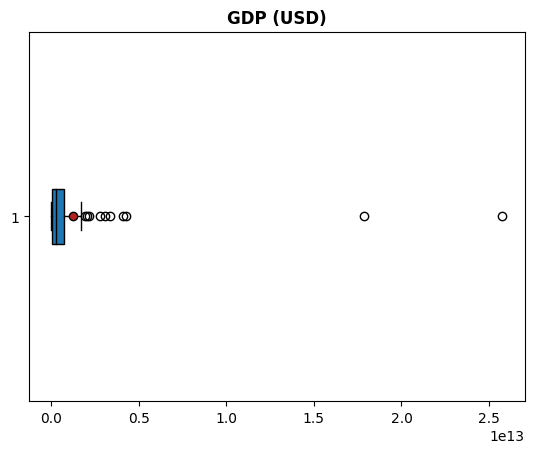

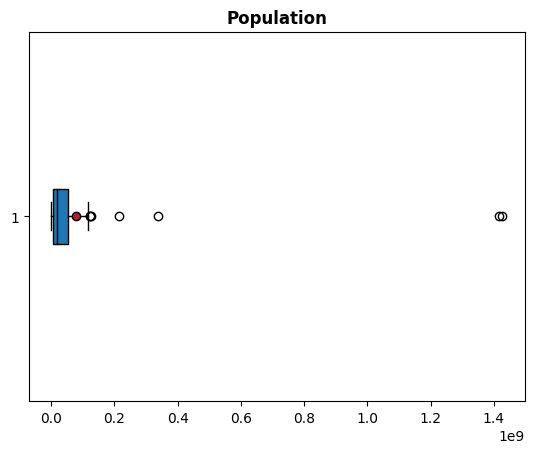

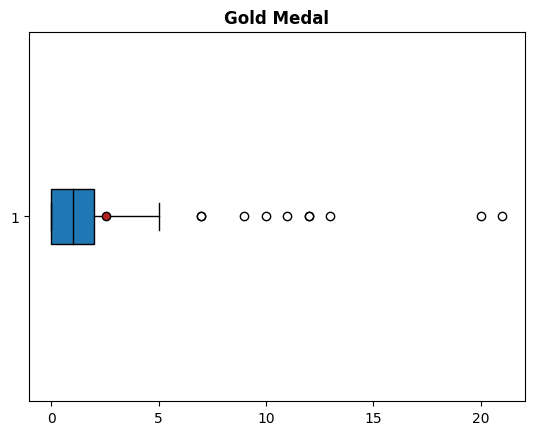

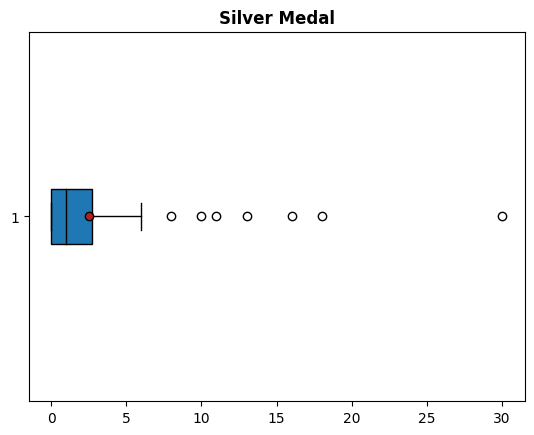

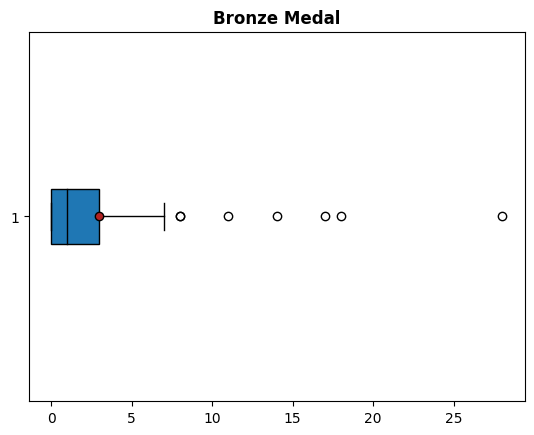

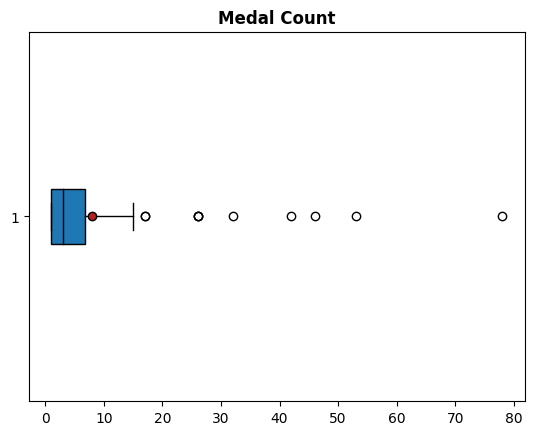

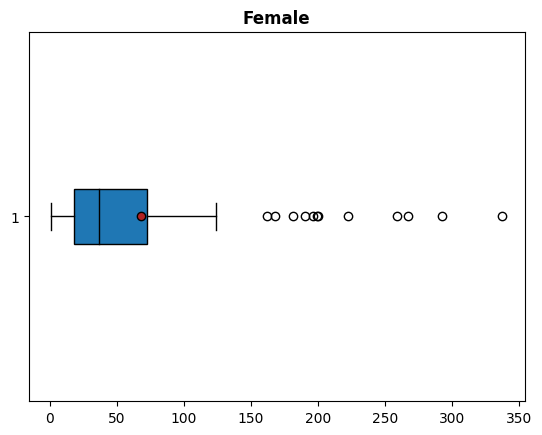

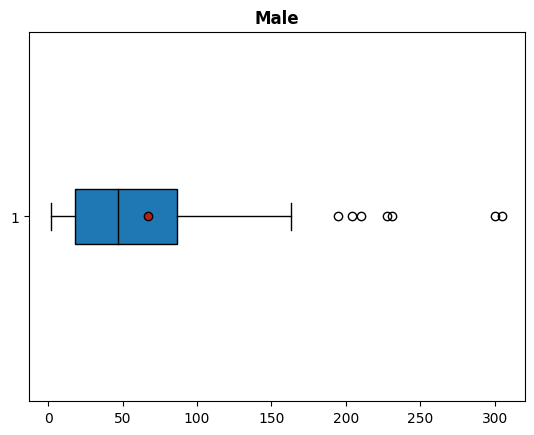

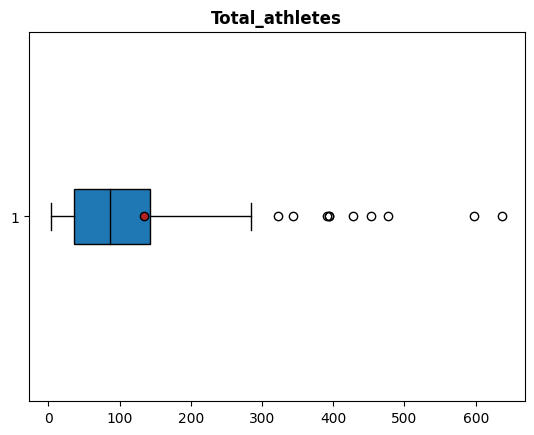

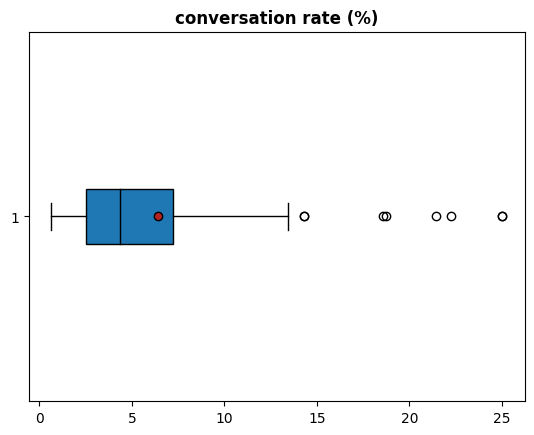

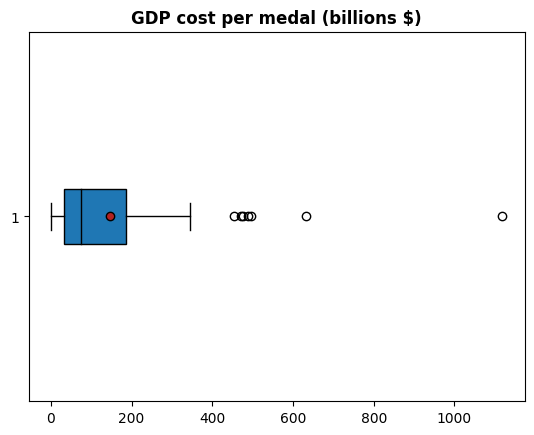

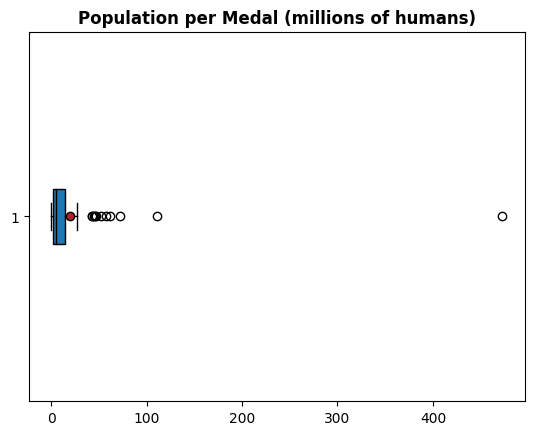

In [98]:
#boxplot for each variable
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Columns to exclude
columns_to_exclude = ['country']

# Select all columns except the specified ones
df_selected = data.drop(columns=columns_to_exclude)

for i in df_selected.columns :
    plt.boxplot(df_selected[i], vert=False, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(i, fontweight='bold')
    plt.show()

In [99]:
# Iterate over each column in the selected DataFrame
for i in data.columns[1:]:
    print("Top 5 : " + i)
    print(data.sort_values(i, ascending=False).iloc[:5,0].reset_index(drop=True))
    print("Bottom 5 : " + i)
    print(data.sort_values(i, ascending=True).iloc[:5,0].reset_index(drop=True))
    print("-------------------------")

Top 5 : GDP (USD)
0        USA
1      China
2      Japan
3    Germany
4      India
Name: country, dtype: object
Bottom 5 : GDP (USD)
0       Dominica
1     Cape Verde
2    Saint Lucia
3           Fiji
4         Kosovo
Name: country, dtype: object
-------------------------
Top 5 : Population
0     China
1     India
2       USA
3    Brazil
4    Mexico
Name: country, dtype: object
Bottom 5 : Population
0       Dominica
1    Saint Lucia
2     Cape Verde
3           Fiji
4         Kosovo
Name: country, dtype: object
-------------------------
Top 5 : Gold Medal
0            China
1              USA
2        Australia
3    Great Britain
4           France
Name: country, dtype: object
Bottom 5 : Gold Medal
0    North Korea
1        Jamaica
2         Greece
3      Lithuania
4        Moldova
Name: country, dtype: object
-------------------------
Top 5 : Silver Medal
0              USA
1            China
2           France
3    Great Britain
4        Australia
Name: country, dtype: object
Bottom 

## **4.2 Correlation between variables**

<Axes: >

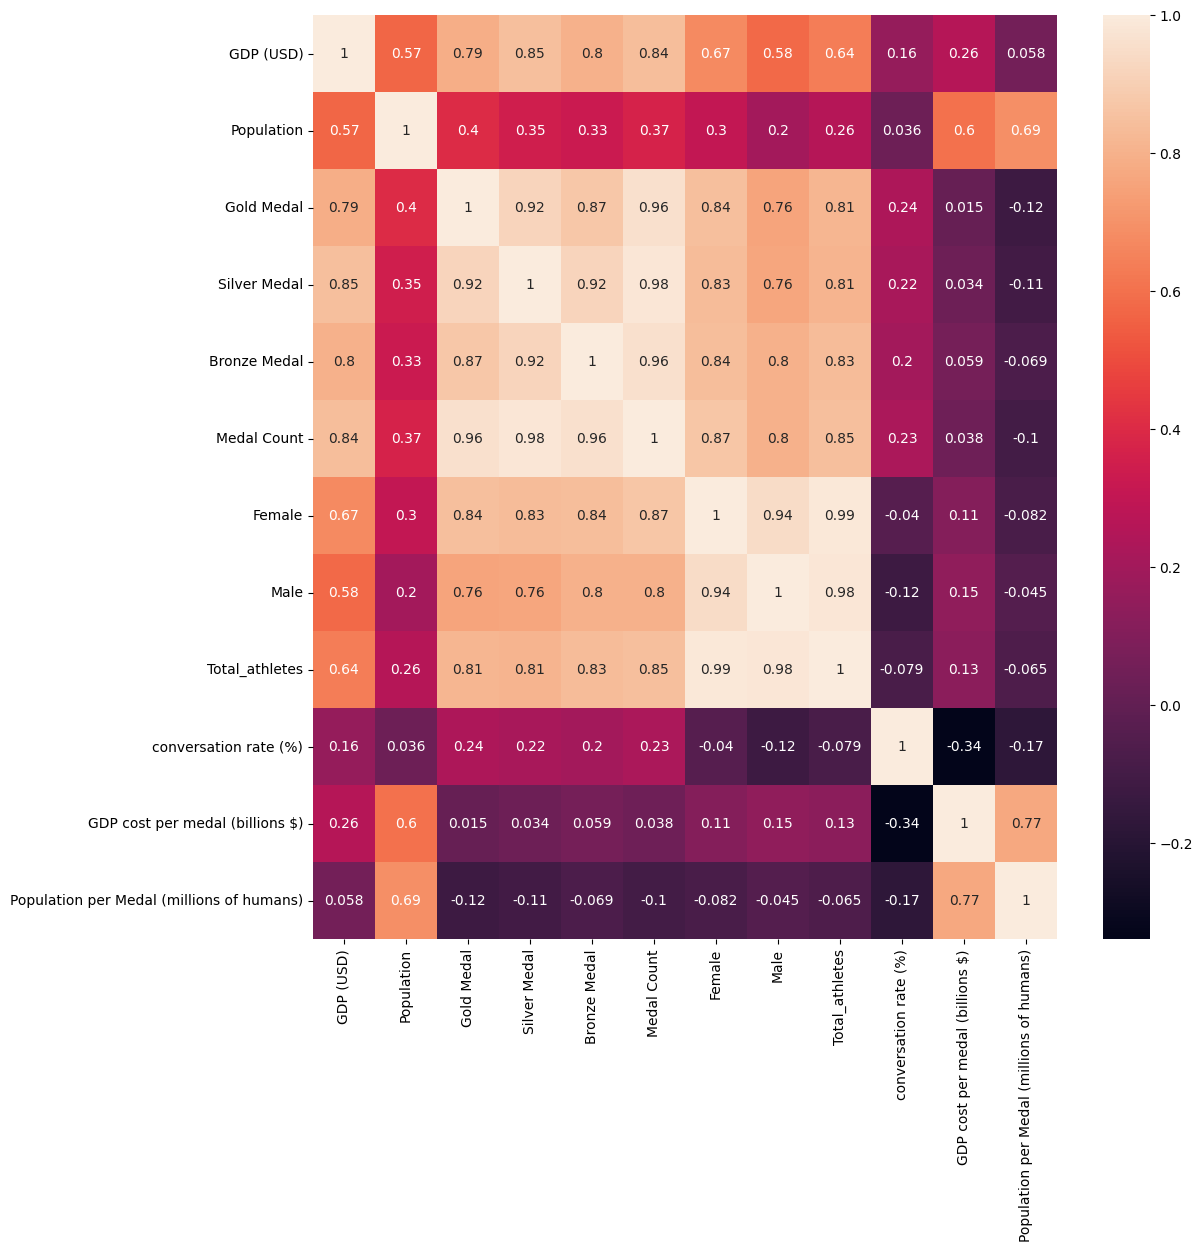

In [100]:
#correlation check
fig = plt.figure(figsize= (12, 12))
sns.heatmap(df_selected.corr(), annot=True)

## **4.3 Best performing and worst performing countries (all countries) for conversation rate (Medals/number of athletes), GDP cost per medal and Population per medal**

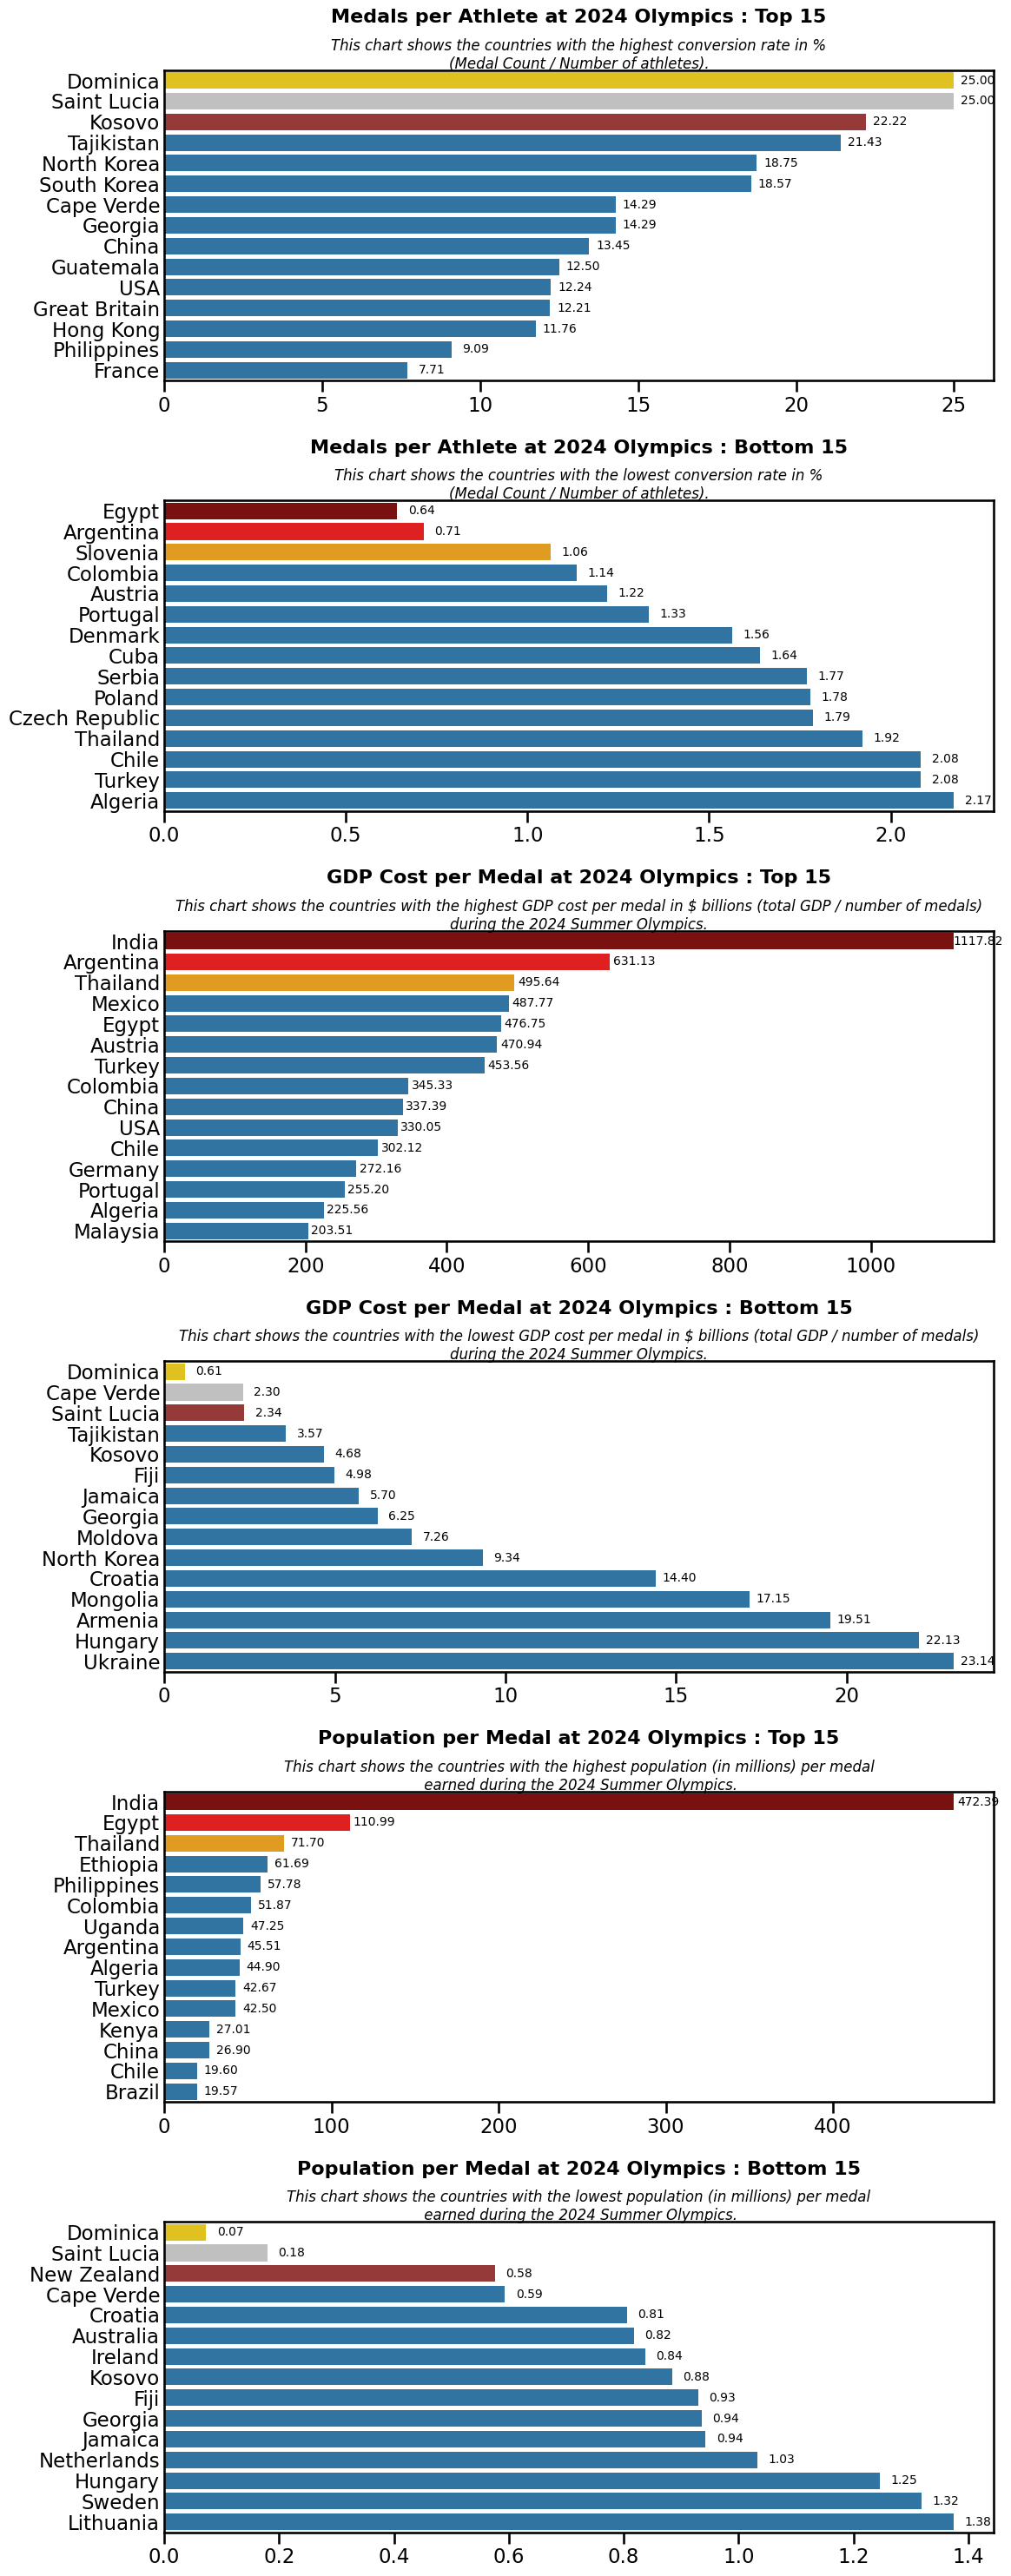

In [101]:
# Define the number of top and bottom entries
n = 15

# Extract the top 15 and bottom 15 for each variable
top_medals_per_athlete = data.nlargest(n, 'conversation rate (%)')
bottom_medals_per_athlete = data.nsmallest(n, 'conversation rate (%)')

top_gdp_cost_per_medal = data.nlargest(n, 'GDP cost per medal (billions $)')
bottom_gdp_cost_per_medal = data.nsmallest(n, 'GDP cost per medal (billions $)')

top_population_per_medal = data.nlargest(n, 'Population per Medal (millions of humans)')
bottom_population_per_medal = data.nsmallest(n, 'Population per Medal (millions of humans)')

# Function to apply specific colors
def apply_colors(df, top=True):
    colors = ['gold', 'silver', 'brown'] + ['#1f77b4']*(len(df)-3)
    if not top:
        colors = ['darkred', 'red', 'orange'] + ['#1f77b4']*(len(df)-3)
    return colors

# Function to add values on bars
def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center',
                    xytext=(20, 0),
                    textcoords='offset points',
                    fontsize=10)

# Set the style and context for the plots
plt.style.use('default')
sns.set_context("talk", font_scale=1.0)  # Reduced the font_scale

# Create the plots
fig, axes = plt.subplots(6, 1, figsize=(12, 30))
fig.subplots_adjust(hspace=0.5)

# Define custom font properties for title and subtitle
title_font = {'fontsize': 16, 'fontweight': 'bold'}
subtitle_font = {'fontsize': 12, 'fontstyle': 'italic'}

# Plot 1: Top 15 Medals per Athlete
colors = apply_colors(top_medals_per_athlete)
ax = sns.barplot(x='conversation rate (%)', y='country', data=top_medals_per_athlete, ax=axes[0], hue='country', palette=colors, legend=False, zorder=2)
axes[0].set_title('Medals per Athlete at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[0].text(0.5, 1.02, 'This chart shows the countries with the highest conversion rate in %\n(Medal Count / Number of athletes).\n', ha='center', va='center', transform=axes[0].transAxes, fontdict=subtitle_font)
axes[0].set_xlabel('')  # Remove the x-axis label
axes[0].set_ylabel('')  # Remove the y-axis label
axes[0].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 2: Bottom 15 Medals per Athlete
colors = apply_colors(bottom_medals_per_athlete, top=False)
ax = sns.barplot(x='conversation rate (%)', y='country', data=bottom_medals_per_athlete, ax=axes[1], hue='country', palette=colors, legend=False, zorder=2)
axes[1].set_title('Medals per Athlete at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[1].text(0.5, 1.02, 'This chart shows the countries with the lowest conversion rate in %\n(Medal Count / Number of athletes).\n', ha='center', va='center', transform=axes[1].transAxes, fontdict=subtitle_font)
axes[1].set_xlabel('')  # Remove the x-axis label
axes[1].set_ylabel('')  # Remove the y-axis label
axes[1].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 3: Top 15 GDP Cost per Medal
colors = apply_colors(top_gdp_cost_per_medal, top=False)
ax = sns.barplot(x='GDP cost per medal (billions $)', y='country', data=top_gdp_cost_per_medal, ax=axes[2], hue='country', palette=colors, legend=False, zorder=2)
axes[2].set_title('GDP Cost per Medal at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[2].text(0.5, 1.02, 'This chart shows the countries with the highest GDP cost per medal in $ billions (total GDP / number of medals)\nduring the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[2].transAxes, fontdict=subtitle_font)
axes[2].set_xlabel('')  # Remove the x-axis label
axes[2].set_ylabel('')  # Remove the y-axis label
axes[2].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 4: Bottom 15 GDP Cost per Medal
colors = apply_colors(bottom_gdp_cost_per_medal)
ax = sns.barplot(x='GDP cost per medal (billions $)', y='country', data=bottom_gdp_cost_per_medal, ax=axes[3], hue='country', palette=colors, legend=False, zorder=2)
axes[3].set_title('GDP Cost per Medal at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[3].text(0.5, 1.02, 'This chart shows the countries with the lowest GDP cost per medal in $ billions (total GDP / number of medals)\nduring the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[3].transAxes, fontdict=subtitle_font)
axes[3].set_xlabel('')  # Remove the x-axis label
axes[3].set_ylabel('')  # Remove the y-axis label
axes[3].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 5: Top 15 Population per Medal
colors = apply_colors(top_population_per_medal, top=False)
ax = sns.barplot(x='Population per Medal (millions of humans)', y='country', data=top_population_per_medal, ax=axes[4], hue='country', palette=colors, legend=False, zorder=2)
axes[4].set_title('Population per Medal at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[4].text(0.5, 1.02, 'This chart shows the countries with the highest population (in millions) per medal\n earned during the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[4].transAxes, fontdict=subtitle_font)
axes[4].set_ylabel('')  # Remove the y-axis label
axes[4].set_xlabel('')  # Remove the x-axis label
axes[4].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 6: Bottom 15 Population per Medal
colors = apply_colors(bottom_population_per_medal)
ax = sns.barplot(x='Population per Medal (millions of humans)', y='country', data=bottom_population_per_medal, ax=axes[5], hue='country', palette=colors, legend=False, zorder=2)
axes[5].set_title('Population per Medal at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[5].text(0.5, 1.02, 'This chart shows the countries with the lowest population (in millions) per medal\n earned during the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[5].transAxes, fontdict=subtitle_font)
axes[5].set_xlabel('')  # Remove the x-axis label
axes[5].set_ylabel('')  # Remove the y-axis label
axes[5].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

plt.tight_layout()
plt.show()

## **4.4 Best performing and worst performing countries (countries with population > 10 million) for conversation rate (Medals/number of athletes), GDP cost per medal and Population per medal**

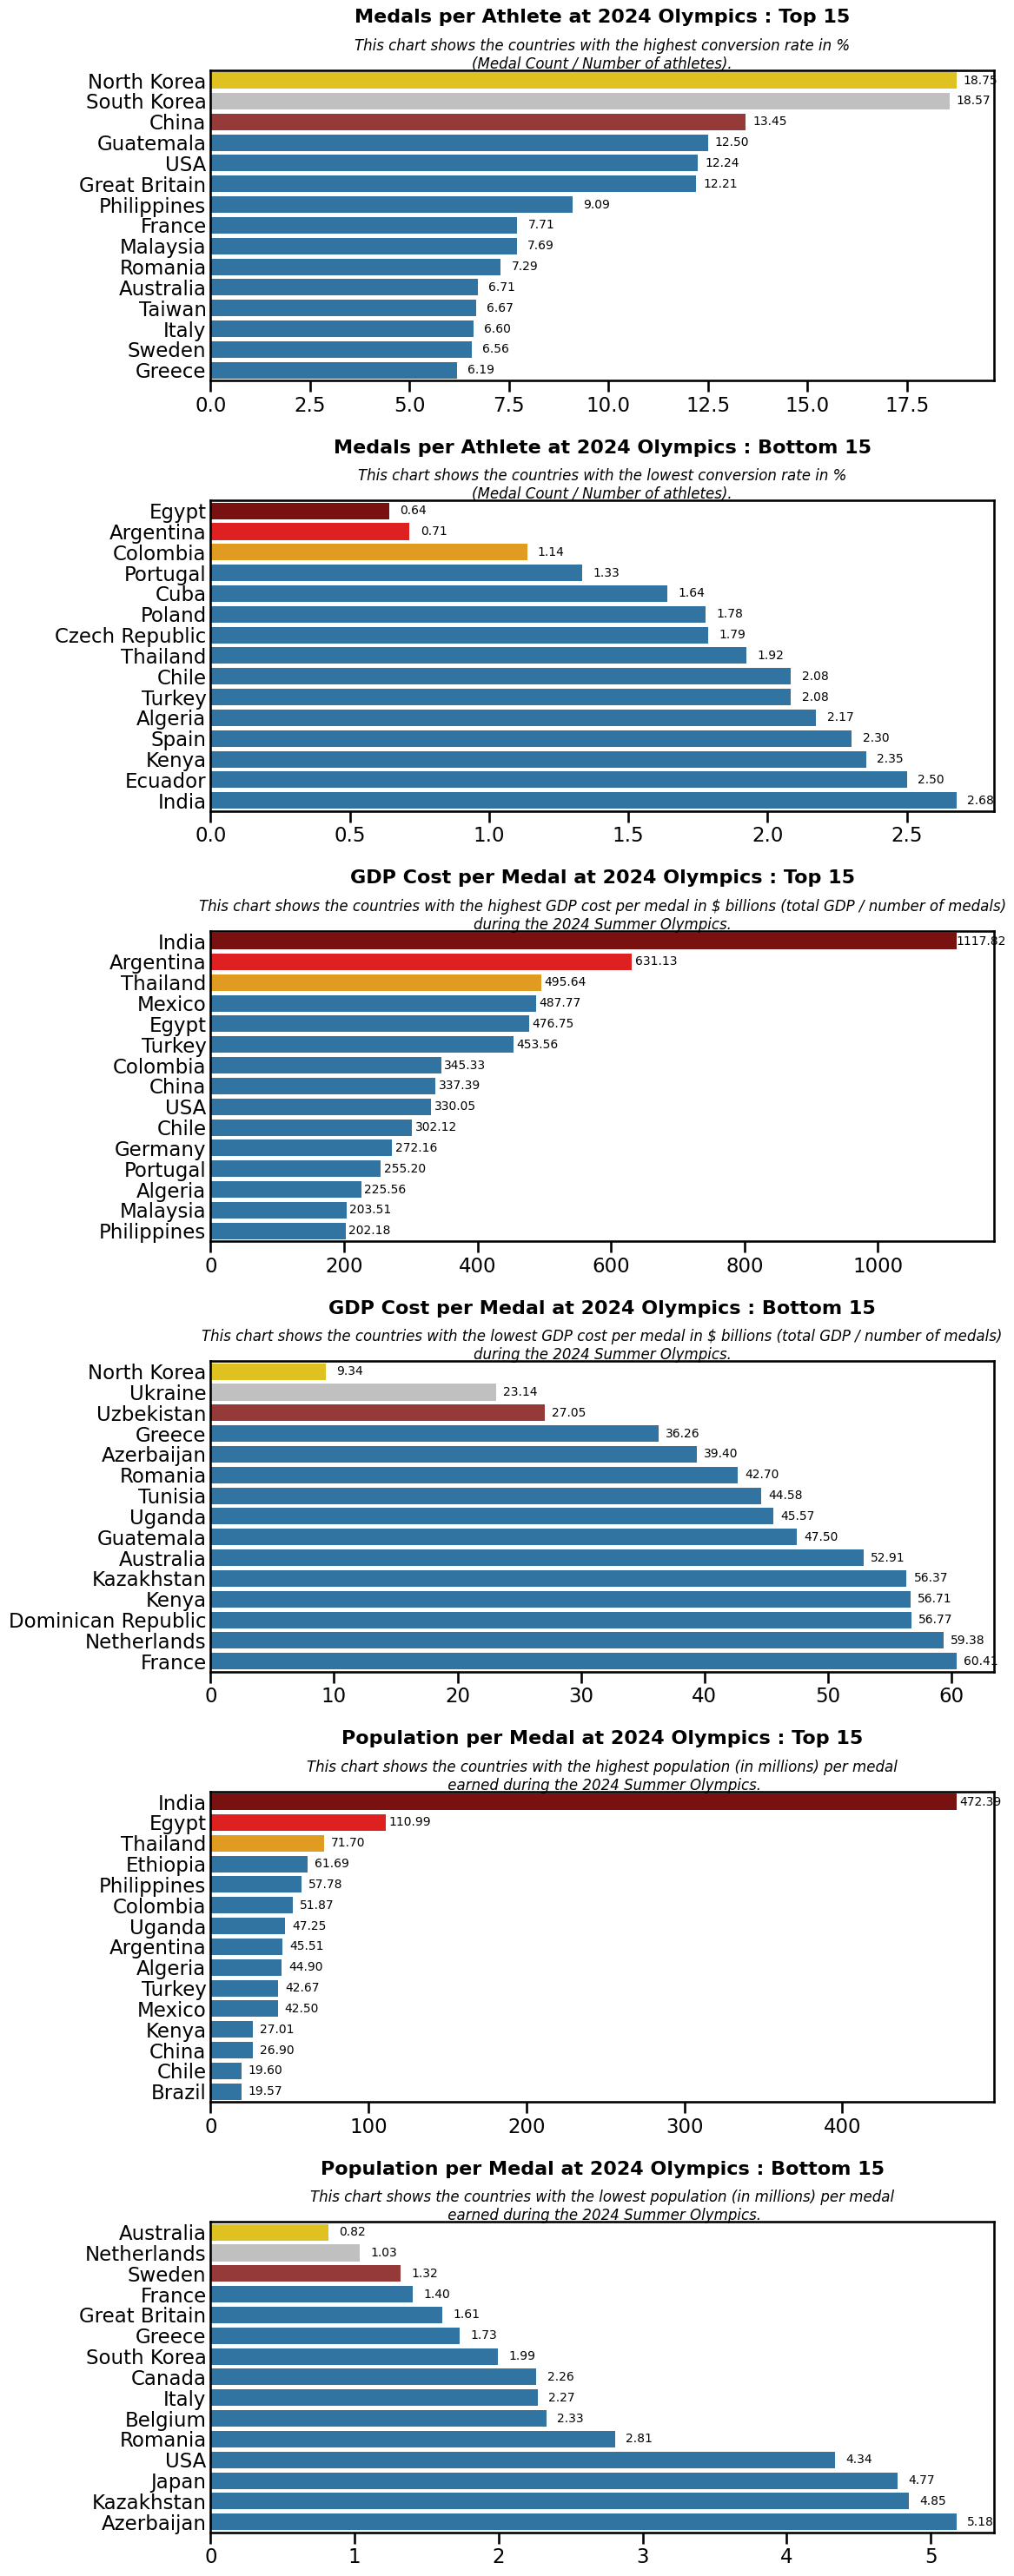

In [102]:
# Define the number of top and bottom entries
n = 15

# Filter the data for countries with a population greater than 10 million
data_high_population = data[data['Population'] > 10000000]

# Extract the top 15 and bottom 15 for each variable
top_medals_per_athlete = data_high_population.nlargest(n, 'conversation rate (%)')
bottom_medals_per_athlete = data_high_population.nsmallest(n, 'conversation rate (%)')

top_gdp_cost_per_medal = data_high_population.nlargest(n, 'GDP cost per medal (billions $)')
bottom_gdp_cost_per_medal = data_high_population.nsmallest(n, 'GDP cost per medal (billions $)')

top_population_per_medal = data_high_population.nlargest(n, 'Population per Medal (millions of humans)')
bottom_population_per_medal = data_high_population.nsmallest(n, 'Population per Medal (millions of humans)')

# Function to apply specific colors
def apply_colors(df, top=True):
    colors = ['gold', 'silver', 'brown'] + ['#1f77b4']*(len(df)-3)
    if not top:
        colors = ['darkred', 'red', 'orange'] + ['#1f77b4']*(len(df)-3)
    return colors

# Function to add values on bars
def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center',
                    xytext=(20, 0),
                    textcoords='offset points',
                    fontsize=10)

# Set the style and context for the plots
plt.style.use('default')
sns.set_context("talk", font_scale=1.0)  # Reduced the font_scale

# Create the plots
fig, axes = plt.subplots(6, 1, figsize=(12, 30))
fig.subplots_adjust(hspace=0.5)

# Define custom font properties for title and subtitle
title_font = {'fontsize': 16, 'fontweight': 'bold'}
subtitle_font = {'fontsize': 12, 'fontstyle': 'italic'}

# Plot 1: Top 15 Medals per Athlete
colors = apply_colors(top_medals_per_athlete)
ax = sns.barplot(x='conversation rate (%)', y='country', data=top_medals_per_athlete, ax=axes[0], hue='country', palette=colors, legend=False, zorder=2)
axes[0].set_title('Medals per Athlete at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[0].text(0.5, 1.02, 'This chart shows the countries with the highest conversion rate in %\n(Medal Count / Number of athletes).\n', ha='center', va='center', transform=axes[0].transAxes, fontdict=subtitle_font)
axes[0].set_xlabel('')  # Remove the x-axis label
axes[0].set_ylabel('')  # Remove the y-axis label
axes[0].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 2: Bottom 15 Medals per Athlete
colors = apply_colors(bottom_medals_per_athlete, top=False)
ax = sns.barplot(x='conversation rate (%)', y='country', data=bottom_medals_per_athlete, ax=axes[1], hue='country', palette=colors, legend=False, zorder=2)
axes[1].set_title('Medals per Athlete at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[1].text(0.5, 1.02, 'This chart shows the countries with the lowest conversion rate in %\n(Medal Count / Number of athletes).\n', ha='center', va='center', transform=axes[1].transAxes, fontdict=subtitle_font)
axes[1].set_xlabel('')  # Remove the x-axis label
axes[1].set_ylabel('')  # Remove the y-axis label
axes[1].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 3: Top 15 GDP Cost per Medal
colors = apply_colors(top_gdp_cost_per_medal, top=False)
ax = sns.barplot(x='GDP cost per medal (billions $)', y='country', data=top_gdp_cost_per_medal, ax=axes[2], hue='country', palette=colors, legend=False, zorder=2)
axes[2].set_title('GDP Cost per Medal at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[2].text(0.5, 1.02, 'This chart shows the countries with the highest GDP cost per medal in $ billions (total GDP / number of medals)\nduring the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[2].transAxes, fontdict=subtitle_font)
axes[2].set_xlabel('')  # Remove the x-axis label
axes[2].set_ylabel('')  # Remove the y-axis label
axes[2].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 4: Bottom 15 GDP Cost per Medal
colors = apply_colors(bottom_gdp_cost_per_medal)
ax = sns.barplot(x='GDP cost per medal (billions $)', y='country', data=bottom_gdp_cost_per_medal, ax=axes[3], hue='country', palette=colors, legend=False, zorder=2)
axes[3].set_title('GDP Cost per Medal at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[3].text(0.5, 1.02, 'This chart shows the countries with the lowest GDP cost per medal in $ billions (total GDP / number of medals)\nduring the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[3].transAxes, fontdict=subtitle_font)
axes[3].set_xlabel('')  # Remove the x-axis label
axes[3].set_ylabel('')  # Remove the y-axis label
axes[3].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 5: Top 15 Population per Medal
colors = apply_colors(top_population_per_medal, top=False)
ax = sns.barplot(x='Population per Medal (millions of humans)', y='country', data=top_population_per_medal, ax=axes[4], hue='country', palette=colors, legend=False, zorder=2)
axes[4].set_title('Population per Medal at 2024 Olympics : Top 15\n\n', fontdict=title_font)
axes[4].text(0.5, 1.02, 'This chart shows the countries with the highest population (in millions) per medal\n earned during the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[4].transAxes, fontdict=subtitle_font)
axes[4].set_ylabel('')  # Remove the y-axis label
axes[4].set_xlabel('')  # Remove the x-axis label
axes[4].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

# Plot 6: Bottom 15 Population per Medal
colors = apply_colors(bottom_population_per_medal)
ax = sns.barplot(x='Population per Medal (millions of humans)', y='country', data=bottom_population_per_medal, ax=axes[5], hue='country', palette=colors, legend=False, zorder=2)
axes[5].set_title('Population per Medal at 2024 Olympics : Bottom 15\n\n', fontdict=title_font)
axes[5].text(0.5, 1.02, 'This chart shows the countries with the lowest population (in millions) per medal\n earned during the 2024 Summer Olympics.\n', ha='center', va='center', transform=axes[5].transAxes, fontdict=subtitle_font)
axes[5].set_xlabel('')  # Remove the x-axis label
axes[5].set_ylabel('')  # Remove the y-axis label
axes[5].tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
add_values_on_bars(ax)

plt.tight_layout()
plt.show()

# **Step 5 - Principal Component Analysis**

## **5.1 Preliminary**

### **5.1.1 Imports for PCA and kmeans**

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid

from matplotlib.collections import LineCollection

### **5.1.2. Graphics and Options**

In [104]:
#seaborn loading
sns.set()

## **5.2. Data preparation**

In [105]:
data.head()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
0,Argentina,6.311330e+11,45510318.0,1.0,0.0,0.0,1.0,33.0,107.0,140.0,0.714286,631.133000,45.510318
1,Armenia,1.951347e+10,2780469.0,0.0,1.0,0.0,1.0,2.0,13.0,15.0,6.666667,19.513475,2.780469
2,Australia,1.692960e+12,26177413.0,13.0,11.0,8.0,32.0,267.0,210.0,477.0,6.708595,52.905000,0.818044
3,Austria,4.709420e+11,8939617.0,0.0,0.0,1.0,1.0,37.0,45.0,82.0,1.219512,470.942000,8.939617
4,Azerbaijan,7.880747e+10,10358074.0,2.0,0.0,0.0,2.0,20.0,28.0,48.0,4.166667,39.403735,5.179037


In [106]:
data.tail()

,country,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
65,USA,2.574410e+13,338289857.0,20.0,30.0,28.0,78.0,337.0,300.0,637.0,12.244898,330.052564,4.337049
66,Uzbekistan,8.114082e+10,34627652.0,1.0,0.0,2.0,3.0,32.0,56.0,88.0,3.409091,27.046941,11.542551
67,Kosovo,9.354903e+09,1768086.0,0.0,1.0,1.0,2.0,7.0,2.0,9.0,22.222222,4.677452,0.884043
68,South Africa,4.052710e+11,59893885.0,1.0,1.0,2.0,4.0,62.0,78.0,140.0,2.857143,101.317750,14.973471
69,Taiwan,7.609100e+11,23893394.0,1.0,0.0,3.0,4.0,34.0,26.0,60.0,6.666667,190.227500,5.973349


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    70 non-null     object 
 1   GDP (USD)                                  70 non-null     float64
 2   Population                                 70 non-null     float64
 3   Gold Medal                                 70 non-null     float64
 4   Silver Medal                               70 non-null     float64
 5   Bronze Medal                               70 non-null     float64
 6   Medal Count                                70 non-null     float64
 7   Female                                     70 non-null     float64
 8   Male                                       70 non-null     float64
 9   Total_athletes                             70 non-null     float64
 10  conversation rate (%)       

In [108]:
data.describe()

,GDP (USD),Population,Gold Medal,Silver Medal,Bronze Medal,Medal Count,Female,Male,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
count,7.000000e+01,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.261219e+12,7.739018e+07,2.542857,2.528571,2.942857,8.014286,67.757143,67.271429,135.028571,6.425960,145.419097,19.798779
std,3.738891e+12,2.383676e+08,4.451626,4.980313,4.787925,13.758257,78.233288,69.090766,145.253998,5.855759,186.812351,58.642614
min,6.071593e+08,7.273700e+04,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,4.000000,0.641026,0.607159,0.072737
25%,7.369967e+10,7.288240e+06,0.000000,0.000000,0.000000,1.000000,18.000000,18.250000,36.500000,2.544643,32.713023,1.531628
50%,2.947290e+11,1.792245e+07,1.000000,1.000000,1.000000,3.000000,37.000000,47.000000,86.500000,4.375022,73.672530,4.808436
75%,7.431232e+11,5.185947e+07,2.000000,2.750000,3.000000,6.750000,72.250000,86.250000,142.250000,7.233456,187.032443,14.319133
max,2.574410e+13,1.425887e+09,21.000000,30.000000,28.000000,78.000000,337.000000,305.000000,637.000000,25.000000,1117.823333,472.391058


### **5.2.1. Data selection**

In [109]:
#we remove Bronze Medal, Silver Medal, Gold Medal as these variables are highly correlated to Medal Count
#re remove Male and Female as these variables are highly correlated with Total_athletes
#please refer to 4.2 for the correlation table
cols = ["Bronze Medal", "Silver Medal", "Gold Medal", "Male", "Female"]
data = data.drop(cols, axis=1)
#we could also run a check on outliers (under checking)
#checking dataset
data.head()

,country,GDP (USD),Population,Medal Count,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
0,Argentina,6.311330e+11,45510318.0,1.0,140.0,0.714286,631.133000,45.510318
1,Armenia,1.951347e+10,2780469.0,1.0,15.0,6.666667,19.513475,2.780469
2,Australia,1.692960e+12,26177413.0,32.0,477.0,6.708595,52.905000,0.818044
3,Austria,4.709420e+11,8939617.0,1.0,82.0,1.219512,470.942000,8.939617
4,Azerbaijan,7.880747e+10,10358074.0,2.0,48.0,4.166667,39.403735,5.179037


### **5.2.2. Data selection**

In [110]:
#if needed we could replace null values (in our case the dataset is clean)
#df = df.fillna(df.mean())
#df.isna().mean()

### **5.2.3. Data split**

In [111]:
# Set the first column as index
data.set_index(data.columns[0], inplace=True)
#get values
X = data.values
X[:5]

array([[6.31133000e+11, 4.55103180e+07, 1.00000000e+00, 1.40000000e+02,
        7.14285714e-01, 6.31133000e+02, 4.55103180e+01],
       [1.95134746e+10, 2.78046900e+06, 1.00000000e+00, 1.50000000e+01,
        6.66666667e+00, 1.95134746e+01, 2.78046900e+00],
       [1.69296000e+12, 2.61774130e+07, 3.20000000e+01, 4.77000000e+02,
        6.70859539e+00, 5.29050000e+01, 8.18044156e-01],
       [4.70942000e+11, 8.93961700e+06, 1.00000000e+00, 8.20000000e+01,
        1.21951220e+00, 4.70942000e+02, 8.93961700e+00],
       [7.88074706e+10, 1.03580740e+07, 2.00000000e+00, 4.80000000e+01,
        4.16666667e+00, 3.94037353e+01, 5.17903700e+00]])

In [112]:
X.shape

(70, 7)

In [113]:
#we get the country names
names = data.index
names

Index(['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia',
       'Cape Verde', 'Cuba', 'Czech Republic', 'Germany', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain',
       'Ethiopia', 'Fiji', 'France', 'Great Britain', 'Georgia', 'Greece',
       'Guatemala', 'Hong Kong', 'Croatia', 'Hungary', 'India', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya',
       'South Korea', 'Saint Lucia', 'Lithuania', 'Moldova', 'Mexico',
       'Mongolia', 'Malaysia', 'Netherlands', 'New Zealand', 'Philippines',
       'Poland', 'North Korea', 'Portugal', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'Sweden', 'Thailand', 'Tajikistan', 'Tunisia', 'Turkey',
       'Uganda', 'Ukraine', 'USA', 'Uzbekistan', 'Kosovo', 'South Africa',
       'Taiwan'],
      dtype='object', name='country')

In [114]:
#we get the variable names
features = data.columns
features

Index(['GDP (USD)', 'Population', 'Medal Count', 'Total_athletes',
       'conversation rate (%)', 'GDP cost per medal (billions $)',
       'Population per Medal (millions of humans)'],
      dtype='object')

## **5.3 PCA**

### **5.3.1 Scaling**

In [115]:
#data scaling
scaler = StandardScaler()

In [116]:
#data fitting
scaler.fit(X)

StandardScaler()

In [117]:
#scale X
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.16973904, -0.13470807, -0.51350479,  0.03447288, -0.98243695,
         2.61878245,  0.44161034],
       [-0.33450328, -0.31526266, -0.51350479, -0.83230215,  0.04140275,
        -0.67883467, -0.29229917],
       [ 0.11630664, -0.21639908,  1.75595628,  2.37129838,  0.0486147 ,
        -0.49880041, -0.32600493],
       [-0.2128929 , -0.28923723, -0.51350479, -0.36771073, -0.89553544,
         1.75509423, -0.18651229],
       [-0.31853006, -0.28324356, -0.44029636, -0.60347354, -0.38860993,
        -0.57159404, -0.25110239]])

In [118]:
#we check for a 0 mean and a 1 standard deviation
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01


### **5.3.2. PCA**

In [119]:
#we set an arbitrary number of components
n_components = 6

In [120]:
#we set up our PCA
pca = PCA(n_components=n_components)

In [121]:
#we train it on our scaled dataset
pca.fit(X_scaled)

PCA(n_components=6)

### **5.3.3. Explained variance and scree splot**

In [122]:
#Let's find out the eigenvalues of each component
cov_mat = np.cov(X_scaled.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

#number of components to be taken into account according to Kaiser's rule: eigenvalue > 1
#source : https://statisticsglobe.com/choose-optimal-number-components-pca

Raw Eigenvalues: 
 [3.07697922 2.20509371 1.06394446 0.04925827 0.10695812 0.27258018
 0.32663531]
Percentage of Variance Explained by Each Component: 
 [0.43328891 0.3105132  0.14982075 0.00693637 0.01506145 0.03838374
 0.04599558]


In [123]:
#Register this in a variable :
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.33, 31.05, 14.98,  4.6 ,  3.84,  1.51])

In [124]:
#on a cumulative basis
scree_cum = scree.cumsum().round()
scree_cum

array([43., 74., 89., 94., 98., 99.])

In [125]:
#Next, let's define a variable with the list of our components:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

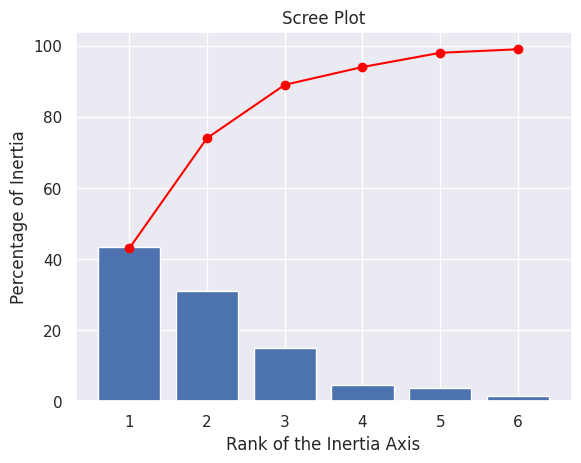

In [126]:
# Graphical illustration
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("Rank of the Inertia Axis")
plt.ylabel("Percentage of Inertia")
plt.title("Scree Plot")
plt.show(block=False)

### **5.3.4. Components**

In [127]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.493055,0.456232,0.453001,0.413340,0.004489,0.327598,0.255635
1,-0.227843,0.260321,-0.393217,-0.307471,-0.300442,0.484221,0.553559
2,0.055313,0.292596,-0.044452,-0.385166,0.846059,-0.100886,0.187098
3,0.569865,0.306122,-0.117848,-0.551643,-0.337036,-0.138406,-0.361380
4,0.285288,-0.522365,-0.029659,-0.150647,0.230508,0.714594,-0.241647
5,0.320127,-0.512043,0.280175,-0.267599,-0.123040,-0.298472,0.617251


In [128]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,GDP (USD),Population,Medal Count,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans)
F1,0.49,0.46,0.45,0.41,0.00,0.33,0.26
F2,-0.23,0.26,-0.39,-0.31,-0.30,0.48,0.55
F3,0.06,0.29,-0.04,-0.39,0.85,-0.10,0.19
F4,0.57,0.31,-0.12,-0.55,-0.34,-0.14,-0.36
F5,0.29,-0.52,-0.03,-0.15,0.23,0.71,-0.24
F6,0.32,-0.51,0.28,-0.27,-0.12,-0.30,0.62


<Axes: >

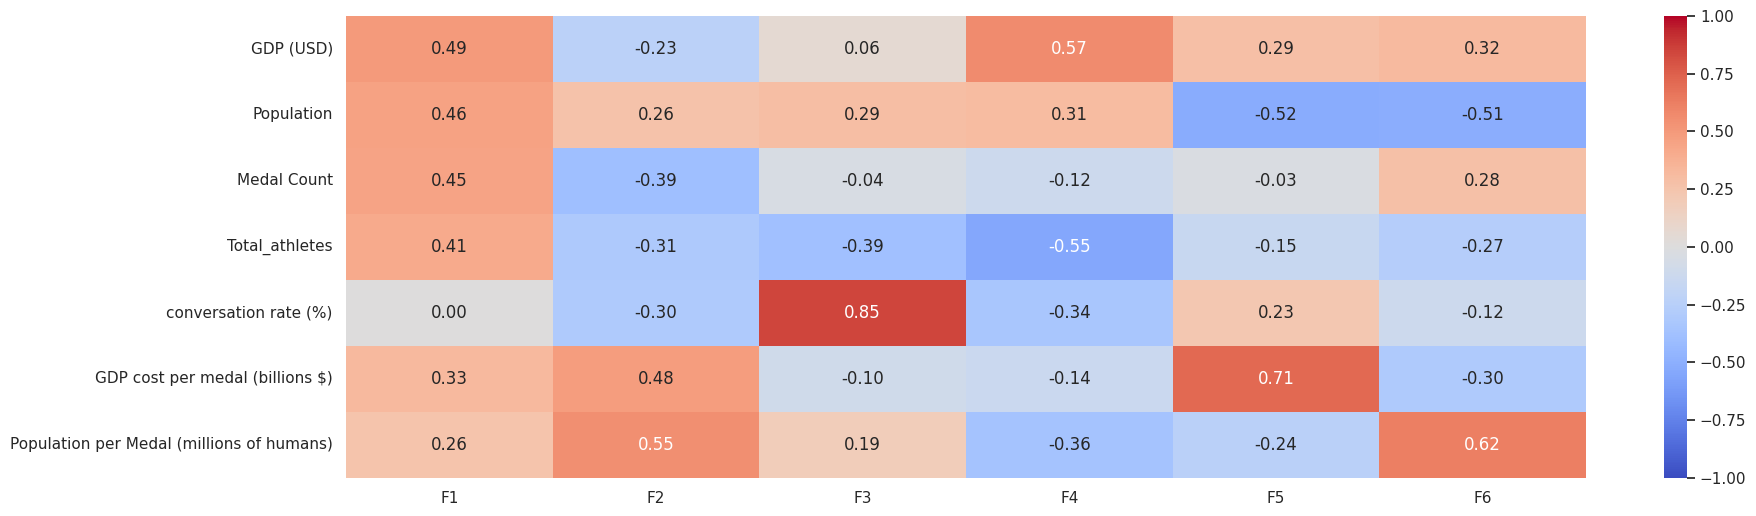

In [129]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

# **Step 6 - kmeans clustering**

## **6.1 Preparation**

In [130]:
#Load graphics libraries
sns.set()

In [131]:
#Save this dataframe to a temporary variable tmp
indexes_to_remove = ['China', 'USA']
df_filtered = data.drop(index=indexes_to_remove)
tmp = df_filtered
tmp = tmp[features]
tmp = tmp.loc[tmp.index.isin(names),]

In [132]:
#instantiate our estimator
kmeans = KMeans(n_clusters=3)

In [133]:
#we fit
kmeans.fit(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [134]:
#inertia calculation
kmeans.inertia_

5.764307601234913e+24

## **6.2 Elbow method**

In [135]:
#define the number of clusters to be tested
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [136]:
#Then, for each value of k, we train a specific k-means and store its inertia:
intertia = []
for i in k_list:
    kmeans = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init to 10
    kmeans.fit(tmp)
    intertia.append(kmeans.inertia_)

print(intertia)

[6.40716497833765e+25, 1.4608676047725376e+25, 5.764307601234913e+24, 3.106962773700147e+24, 1.6664501577198313e+24, 1.1320179642285202e+24, 7.088491985529775e+23, 4.84763807330331e+23, 3.5448252498243515e+23]


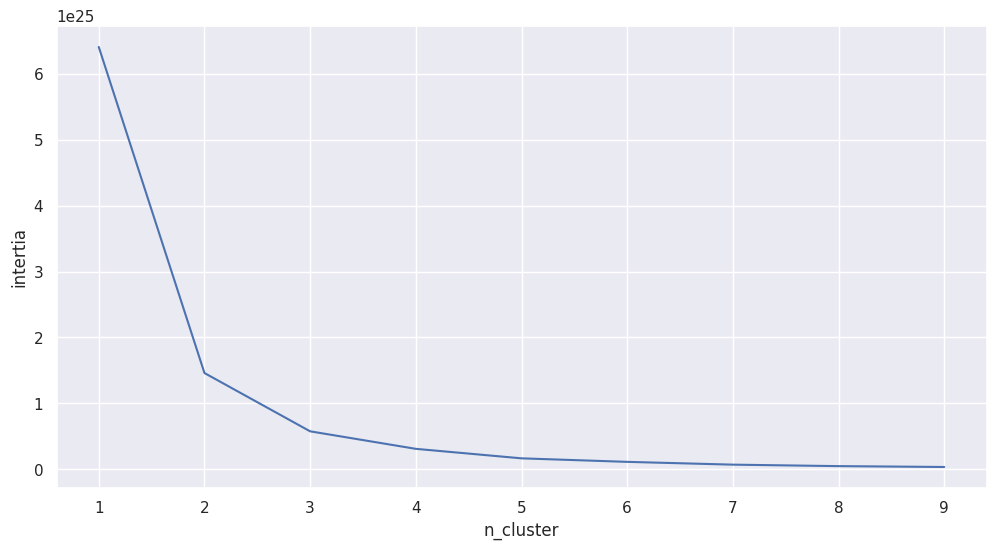

In [137]:
#we display the result
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

## **6.3 Silhouette method**

In [138]:
#The silhouette coefficient ranges from -1 (poor) to 1 (excellent).
from sklearn.metrics import silhouette_score
k_list = range(2, 10)
silhouette = []
for i in k_list:
    k_means = KMeans(n_clusters=i, random_state = 808, n_init=10)
    k_means.fit(tmp)
    k_means_labels = k_means.predict(tmp)
    silhouette.append(silhouette_score(tmp,k_means_labels))

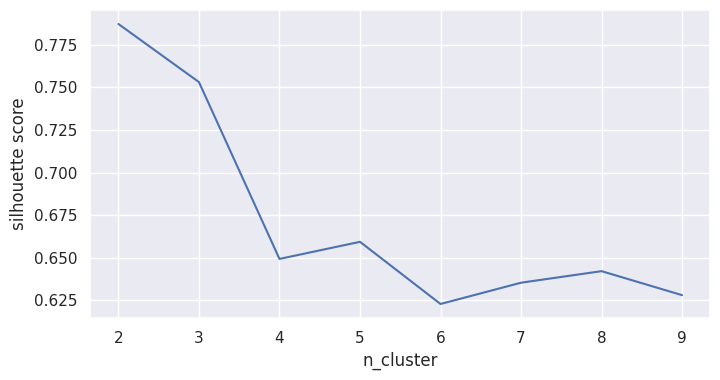

In [139]:
#we display the result
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_ylabel("silhouette score")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, silhouette)

## **6.4 Clustering**

In [140]:
#Let's now look at the clusters we've obtained.
#First, we need to re-train an estimator:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Explicitly setting n_init to 10
kmeans.fit(tmp)

KMeans(n_clusters=2, n_init=10)

In [141]:
#cluster labelling
labels = kmeans.labels_
tmp["cluster"] = labels

In [142]:
tmp["cluster"] = labels+1

In [143]:
#display graphically :sns.pairplot(tmp, hue="cluster")
tmp

,GDP (USD),Population,Medal Count,Total_athletes,conversation rate (%),GDP cost per medal (billions $),Population per Medal (millions of humans),cluster
country,,,,,,,,
Argentina,6.311330e+11,45510318.0,1.0,140.0,0.714286,631.133000,45.510318,1
Armenia,1.951347e+10,2780469.0,1.0,15.0,6.666667,19.513475,2.780469,1
Australia,1.692960e+12,26177413.0,32.0,477.0,6.708595,52.905000,0.818044,2
Austria,4.709420e+11,8939617.0,1.0,82.0,1.219512,470.942000,8.939617,1
Azerbaijan,7.880747e+10,10358074.0,2.0,48.0,4.166667,39.403735,5.179037,1
...,...,...,...,...,...,...,...,...
Ukraine,1.619900e+11,39701739.0,7.0,143.0,4.895105,23.141429,5.671677,1
Uzbekistan,8.114082e+10,34627652.0,3.0,88.0,3.409091,27.046941,11.542551,1
Kosovo,9.354903e+09,1768086.0,2.0,9.0,22.222222,4.677452,0.884043,1


In [144]:
#length of each cluster
for i in tmp['cluster'].unique():
    print('The cluster {} is made of {} countries.'.format(i, len(tmp[tmp['cluster']==i])))

The cluster 1 is made of 58 countries.
The cluster 2 is made of 10 countries.


In [145]:
#what are the final clusters ?
for i in range(1, n_clusters+1) :
     # selection
    sub_df = tmp.loc[tmp.cluster == i]

    # which cluster ?
    print(f"cluster : {i}")

    # extract the names from each line
    names_list = sub_df.index

    # create a list of name/theme pairs
    ziped = zip(names_list)
    txt = [f"{n}" for n in ziped]

    # we convert into str
    txt = " / ".join(txt)

    # print
    print(txt)
    print("\n")

cluster : 1
('Argentina',) / ('Armenia',) / ('Austria',) / ('Azerbaijan',) / ('Belgium',) / ('Switzerland',) / ('Chile',) / ('Colombia',) / ('Cape Verde',) / ('Cuba',) / ('Czech Republic',) / ('Dominica',) / ('Denmark',) / ('Dominican Republic',) / ('Algeria',) / ('Ecuador',) / ('Egypt',) / ('Spain',) / ('Ethiopia',) / ('Fiji',) / ('Georgia',) / ('Greece',) / ('Guatemala',) / ('Hong Kong',) / ('Croatia',) / ('Hungary',) / ('Ireland',) / ('Israel',) / ('Jamaica',) / ('Kazakhstan',) / ('Kenya',) / ('Saint Lucia',) / ('Lithuania',) / ('Moldova',) / ('Mexico',) / ('Mongolia',) / ('Malaysia',) / ('Netherlands',) / ('New Zealand',) / ('Philippines',) / ('Poland',) / ('North Korea',) / ('Portugal',) / ('Romania',) / ('Serbia',) / ('Slovakia',) / ('Slovenia',) / ('Sweden',) / ('Thailand',) / ('Tajikistan',) / ('Tunisia',) / ('Turkey',) / ('Uganda',) / ('Ukraine',) / ('Uzbekistan',) / ('Kosovo',) / ('South Africa',) / ('Taiwan',)


cluster : 2
('Australia',) / ('Brazil',) / ('Canada',) / ('Germ

## **6.5 Cluster charateristics**

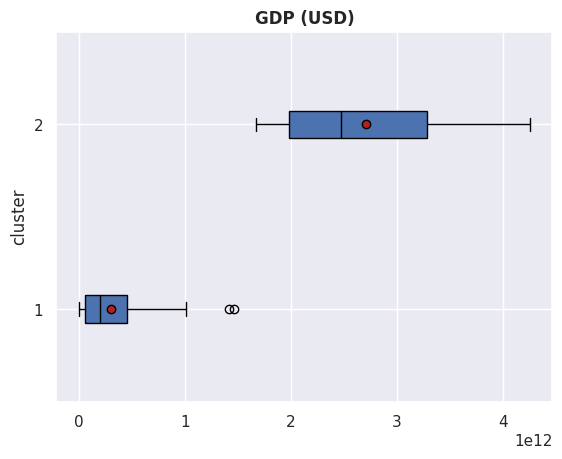

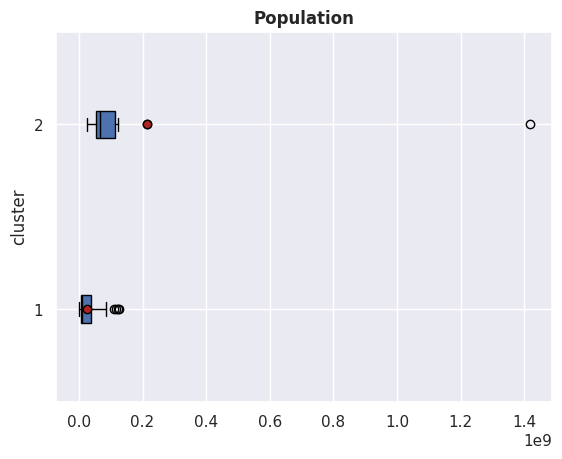

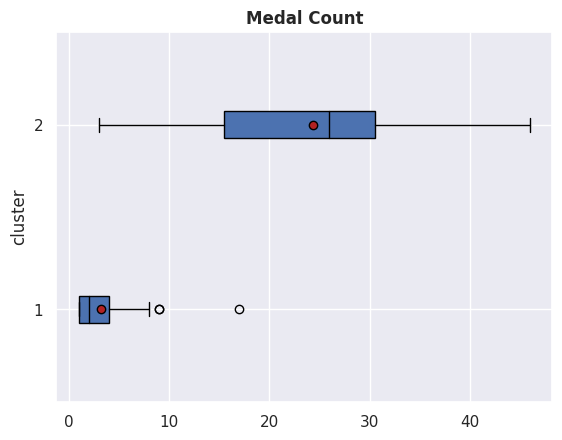

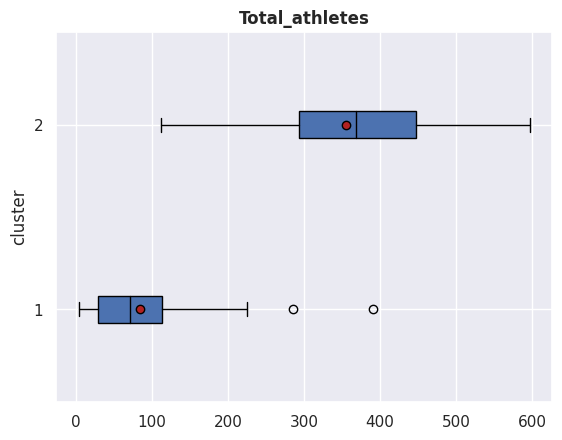

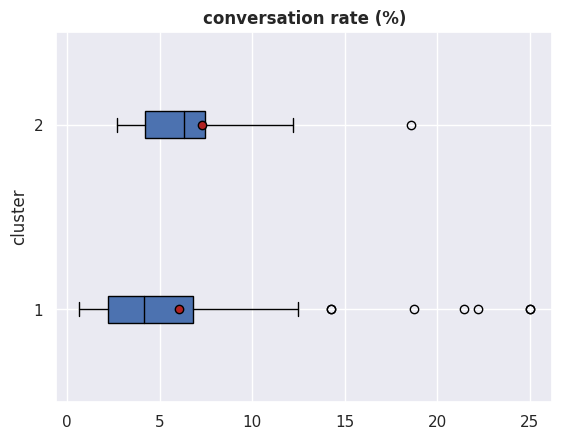

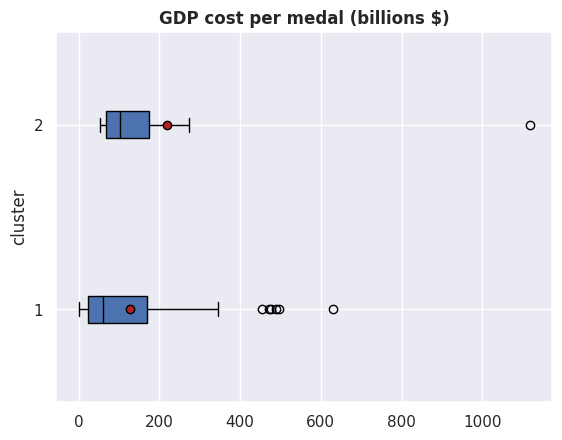

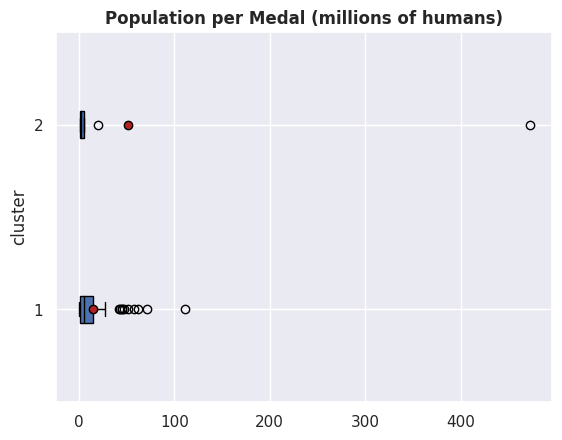

In [146]:
#boxplot for each variable and each cluster
modalites = tmp['cluster'].unique()

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for a in tmp.columns[0:len(tmp.columns)-1]:
    groupes = []
    for m in modalites:
        groupes.append(tmp[tmp['cluster']==m][a])
    plt.boxplot(groupes, vert=False, labels=modalites, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(a, fontweight='bold')
    plt.ylabel('cluster')
    plt.show()

In [147]:
#dataframe avec les centroides
sub_tmp = tmp.groupby('cluster').agg({i: 'mean' for i in tmp.columns})
sub_tmp = sub_tmp.drop('cluster', axis=1)
df_clusters_kmeans = sub_tmp.transpose().apply(pd.to_numeric).style.format(precision=1).background_gradient(axis=1)
df_clusters_kmeans

cluster,1,2
GDP (USD),302619442673.9,2710753000000.0
Population,25960459.6,214742879.4
Medal Count,3.2,24.4
Total_athletes,83.9,355.2
conversation rate (%),6.1,7.3
GDP cost per medal (billions $),126.3,218.9
Population per Medal (millions of humans),14.5,51.3
